In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df.head(20)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [4]:
df.shape

(397, 6)

In [5]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [6]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [7]:
# Checking The NullValues
df.isnull().sum()   

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There are no missing values and found categorical data in dataframe, convert it into numerical data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lab_enc = LabelEncoder()

In [10]:
df2 = lab_enc.fit_transform(df['rank'])
pd.DataFrame(df2)

,0
0,2
1,2
2,1
3,2
4,2
...,...
392,2
393,2
394,2
395,2


In [11]:
df['rank'] = df2
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500
...,...,...,...,...,...,...
392,2,A,33,30,Male,103106
393,2,A,31,19,Male,150564
394,2,A,42,25,Male,101738
395,2,A,25,15,Male,95329


In [12]:
df2 = lab_enc.fit_transform(df['discipline'])
pd.DataFrame(df2)

,0
0,1
1,1
2,1
3,1
4,1
...,...
392,0
393,0
394,0
395,0


In [13]:
df['discipline'] = df2
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500
...,...,...,...,...,...,...
392,2,0,33,30,Male,103106
393,2,0,31,19,Male,150564
394,2,0,42,25,Male,101738
395,2,0,25,15,Male,95329


In [14]:
df2 = lab_enc.fit_transform(df['sex'])
pd.DataFrame(df2)

,0
0,1
1,1
2,1
3,1
4,1
...,...
392,1
393,1
394,1
395,1


In [15]:
df['sex'] = df2
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


data has been converted and chech distribuition of data 

In [16]:
# import required libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

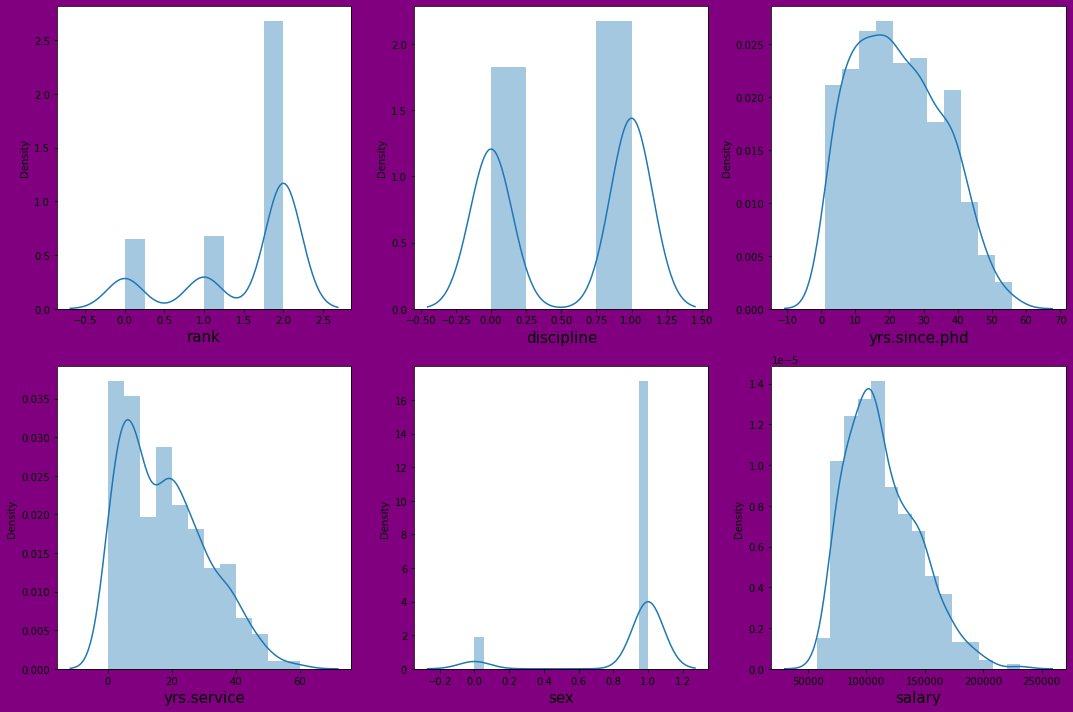

In [17]:
# Let's see how data is distributed for every column

plt.figure(figsize=(15,10), facecolor='purple')
plotnumber = 1

for column in df:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

since there is no much skewness

check reletionship between dependentand independent variables

In [18]:
# divide dataset into features and label
y = df['salary']
X = df.drop(columns = ['salary'])

In [19]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [20]:
X

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


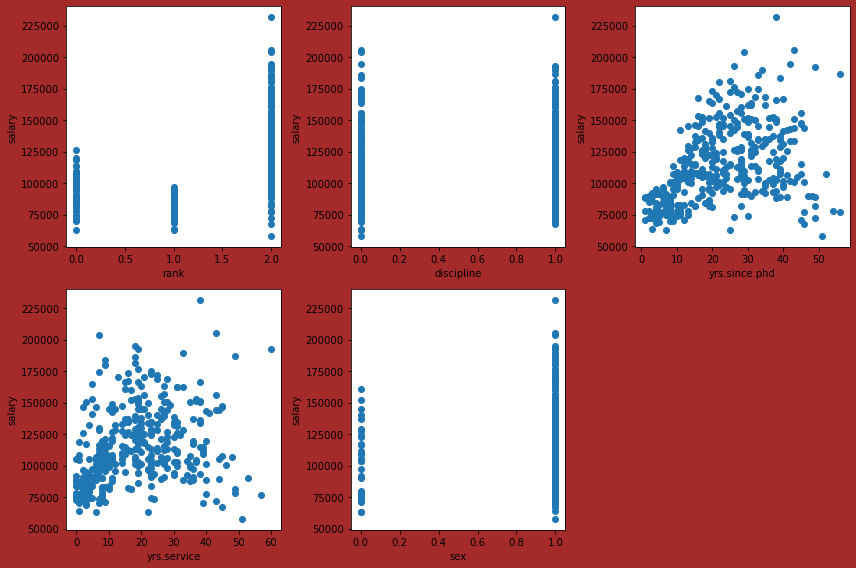

In [21]:
# VisualizinG the relationship
plt.figure(figsize=(12,8), facecolor = 'brown')
plotnumber = 1

for column in X:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('salary',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

relationship is linear

In [23]:
# Data Scaling - Formula Z = (X - mean)/ std

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[ 0.64925739,  0.91540317, -0.25754973,  0.02966908,  0.3300584 ],
       [ 0.64925739,  0.91540317, -0.17985426, -0.12429986,  0.3300584 ],
       [-0.67256406,  0.91540317, -1.42298184, -1.12509795,  0.3300584 ],
       ...,
       [ 0.64925739, -1.09241483,  1.52944617,  0.56856036,  0.3300584 ],
       [ 0.64925739, -1.09241483,  0.20862311, -0.20128433,  0.3300584 ],
       [-0.67256406, -1.09241483, -1.11219995, -1.04811348,  0.3300584 ]])

In [25]:
# Split data into train and test. Model build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 356)
y_train.head()

170     91227
195    113600
69      91412
304    144050
244     84273
Name: salary, dtype: int64

In [26]:
#model
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [27]:
df.head(15)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
5,0,1,6,6,1,97000
6,2,1,30,23,1,175000
7,2,1,45,45,1,147765
8,2,1,21,20,1,119250
9,2,1,18,18,0,129000


In [28]:
# Since we have already fit the scaler, you can transform the data
print ('salary is: ', regression.predict(scaler.transform([[1, 1, 7, 2, 1]])))

salary is:  [105023.87670755]


In [29]:
#checking how model fits in train
regression.score(x_test, y_test)

0.35117742018263864

In [30]:
#plotting and visualising
y_pred = regression.predict(x_test)

In [31]:
y_pred

array([145258.72028435,  77605.57554294,  90456.68566865, 144062.01653285,
       126580.25179419,  86866.57441414, 131319.95394861, 108938.85388626,
       120549.62018509, 114569.91197815, 108985.96673785, 127237.49473443,
       112107.28645847, 133619.13574844, 121610.24719311, 120649.10769955,
       127289.8693973 , 124849.3490427 , 105634.0067962 , 131202.17181965,
       139487.20935898, 118416.8069344 ,  81008.6866518 , 130615.59815679,
       120571.72535018, 135732.20312391, 123037.25339127, 129114.99785196,
       124114.7237531 ,  86843.01798835, 116095.51996948, 119867.36955836,
       124233.95714277, 105023.87670755, 120601.99484796, 133577.28470814,
       132000.75331464, 131835.85833409, 121746.32393659,  98139.44198553,
        88417.76034677,  99016.80152424, 125407.10446848, 134559.05579821,
       145845.2939472 , 126627.36464578, 118724.49173043, 130686.26743417,
       121769.88036239, 122806.95094461,  89283.53834294, 139345.87080422,
       144601.47734411, 1

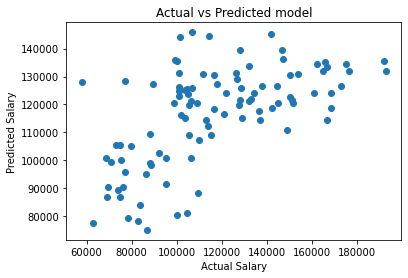

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted model')
plt.show()

In [33]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = regression.predict(x_test)

In [34]:
# MAE
mean_absolute_error(y_test,y_pred)

20771.614194637492

In [35]:
# MSE
mean_squared_error(y_test,y_pred)

653562169.9339244

In [36]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

25564.86201671983